In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from  matplotlib.ticker import PercentFormatter
import seaborn as sns
from IPython.display import Image, display

In [2]:
#Set Option
pd.set_option('max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
sns.set_theme()

In [3]:
df = pd.read_csv('data/Worldometer_4_21.csv', index_col = 0)

In [4]:
df.head(3)

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl
#,,,,,,,,,,,,,,,,,
1,China,90541,21.0,4636,NaN,85600,27.0,305,6.0,63.0,3.0,160000000.0,111163.0,1439323776,15897.0,310467.0,9.0
2,USA,32602051,65057.0,583330,876.0,25177434,73818.0,6841287,10009.0,98032.0,1754.0,433439646.0,1303328.0,332563810,10.0,570.0,1.0
3,India,15924806,315802.0,184672,2102.0,13449406,179543.0,2290728,8944.0,11449.0,133.0,271053392.0,194876.0,1390901395,87.0,7532.0,5.0


Xóa 3 cột cuối cột 

In [5]:
df = df.drop(columns=['1 Caseevery X ppl','1 Deathevery X ppl','1 Testevery X ppl'])

Xóa 2 quốc gia có dân số bị trống

In [6]:
df[df['Population'] == ' ']

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population
#,,,,,,,,,,,,,,
195,Diamond Princess,712,NaN,13,NaN,699,NaN,0,NaN,NaN,NaN,NaN,NaN,
217,MS Zaandam,9,NaN,2,NaN,7,NaN,0,NaN,NaN,NaN,NaN,NaN,


In [7]:
df = df[df['TotalDeaths'] != ' ']

In [8]:
df = df[df['Population'] != ' ']
df

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population
#,,,,,,,,,,,,,,
1,China,90541,21.0,4636,NaN,85600,27.0,305,6.0,63.0,3.0,160000000.0,111163.0,1439323776
2,USA,32602051,65057.0,583330,876.0,25177434,73818.0,6841287,10009.0,98032.0,1754.0,433439646.0,1303328.0,332563810
3,India,15924806,315802.0,184672,2102.0,13449406,179543.0,2290728,8944.0,11449.0,133.0,271053392.0,194876.0,1390901395
4,Brazil,14122795,71910.0,381687,3157.0,12646132,84443.0,1094976,8318.0,66064.0,1785.0,28600000.0,133786.0,213774168
5,France,5374288,34968.0,101881,313.0,4218607,37226.0,1053800,5959.0,82188.0,1558.0,72936321.0,1115408.0,65389827
6,Russia,4727125,8271.0,106706,399.0,4352873,9644.0,267546,2300.0,32381.0,731.0,126500000.0,866528.0,145984885
7,Turkey,4446591,61967.0,36975,362.0,3844342,52213.0,565274,3398.0,52271.0,435.0,44728595.0,525800.0,85067708
8,UK,4395703,2396.0,127327,22.0,4166734,5301.0,101642,300.0,64479.0,1868.0,146043397.0,2142250.0,68172895
9,Italy,3904899,13844.0,117997,364.0,3311267,20552.0,475635,3076.0,64661.0,1954.0,55885251.0,925404.0,60390143


In [9]:
df[['TotalDeaths','Population']] = df[['TotalDeaths','Population']].astype('int')

In [10]:
df.select_dtypes(exclude='object')

,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population
#,,,,,,,,,,,,,
1,90541,21.0,4636,NaN,85600,27.0,305,6.0,63.0,3.0,160000000.0,111163.0,1439323776
2,32602051,65057.0,583330,876.0,25177434,73818.0,6841287,10009.0,98032.0,1754.0,433439646.0,1303328.0,332563810
3,15924806,315802.0,184672,2102.0,13449406,179543.0,2290728,8944.0,11449.0,133.0,271053392.0,194876.0,1390901395
4,14122795,71910.0,381687,3157.0,12646132,84443.0,1094976,8318.0,66064.0,1785.0,28600000.0,133786.0,213774168
5,5374288,34968.0,101881,313.0,4218607,37226.0,1053800,5959.0,82188.0,1558.0,72936321.0,1115408.0,65389827
6,4727125,8271.0,106706,399.0,4352873,9644.0,267546,2300.0,32381.0,731.0,126500000.0,866528.0,145984885
7,4446591,61967.0,36975,362.0,3844342,52213.0,565274,3398.0,52271.0,435.0,44728595.0,525800.0,85067708
8,4395703,2396.0,127327,22.0,4166734,5301.0,101642,300.0,64479.0,1868.0,146043397.0,2142250.0,68172895
9,3904899,13844.0,117997,364.0,3311267,20552.0,475635,3076.0,64661.0,1954.0,55885251.0,925404.0,60390143


In [11]:
def missing_ratio(df):
    return (df.isna().mean() * 100).round(1)
def lower_quartile(df):
    return df.quantile(0.25)
def median(df):
    return df.quantile(0.5)
def upper_quartile(df):
    return df.quantile(0.75)

In [12]:
numeric_df = df.select_dtypes(exclude='object')
numeric_df.agg([missing_ratio, min, lower_quartile, median, upper_quartile, max]).round(1)

,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population
missing_ratio,0.0,12.7,0.0,40.0,0.0,22.4,0.0,27.8,0.0,0.0,2.4,2.4,0.000000e+00
min,4.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,8.0,0.3,470.0,756.0,4.994000e+03
lower_quartile,9216.0,40.0,97.0,5.0,5248.0,38.5,383.0,12.0,2173.0,33.0,144281.2,49195.2,1.214425e+06
median,58865.0,386.0,772.0,14.0,46000.0,306.0,4899.0,71.0,17775.0,236.0,948318.5,244639.5,7.545862e+06
upper_quartile,299038.0,1966.5,6095.0,57.0,269965.0,1991.0,31004.0,518.5,58783.0,820.0,5197058.5,676188.5,2.707341e+07
max,32602051.0,315802.0,583330.0,3157.0,25177434.0,179543.0,6841287.0,10009.0,166962.0,2791.0,433439646.0,6724757.0,1.439324e+09


In [13]:
df.fillna(0,inplace=True)
df

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population
#,,,,,,,,,,,,,,
1,China,90541,21.0,4636,0.0,85600,27.0,305,6.0,63.0,3.0,160000000.0,111163.0,1439323776
2,USA,32602051,65057.0,583330,876.0,25177434,73818.0,6841287,10009.0,98032.0,1754.0,433439646.0,1303328.0,332563810
3,India,15924806,315802.0,184672,2102.0,13449406,179543.0,2290728,8944.0,11449.0,133.0,271053392.0,194876.0,1390901395
4,Brazil,14122795,71910.0,381687,3157.0,12646132,84443.0,1094976,8318.0,66064.0,1785.0,28600000.0,133786.0,213774168
5,France,5374288,34968.0,101881,313.0,4218607,37226.0,1053800,5959.0,82188.0,1558.0,72936321.0,1115408.0,65389827
6,Russia,4727125,8271.0,106706,399.0,4352873,9644.0,267546,2300.0,32381.0,731.0,126500000.0,866528.0,145984885
7,Turkey,4446591,61967.0,36975,362.0,3844342,52213.0,565274,3398.0,52271.0,435.0,44728595.0,525800.0,85067708
8,UK,4395703,2396.0,127327,22.0,4166734,5301.0,101642,300.0,64479.0,1868.0,146043397.0,2142250.0,68172895
9,Italy,3904899,13844.0,117997,364.0,3311267,20552.0,475635,3076.0,64661.0,1954.0,55885251.0,925404.0,60390143


In [14]:
cols = ['TotalCases','NewCases', 'TotalDeaths', 'NewDeaths','TotalRecovered']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


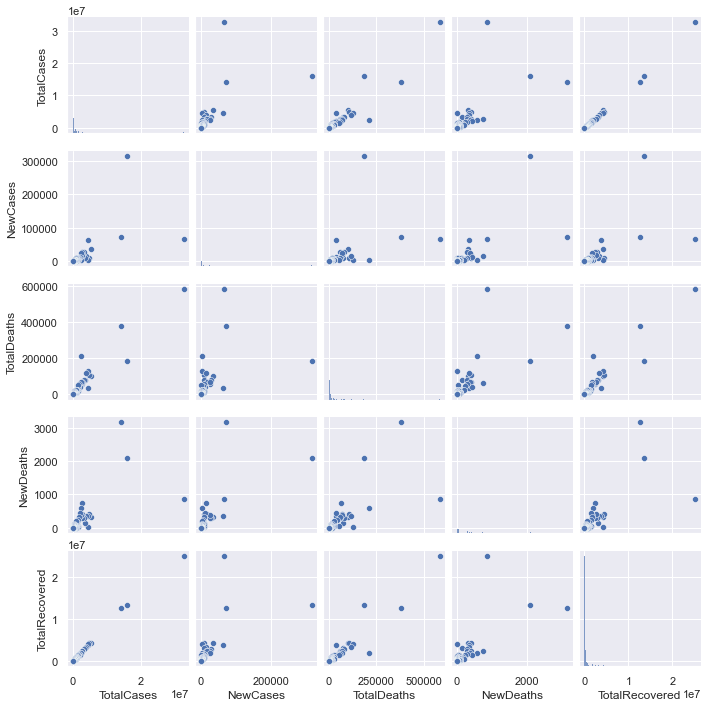

In [15]:
sns.pairplot(df[cols], size=2.0)

In [16]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 218
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country,Other     205 non-null    object 
 1   TotalCases        205 non-null    int64  
 2   NewCases          205 non-null    float64
 3   TotalDeaths       205 non-null    int32  
 4   NewDeaths         205 non-null    float64
 5   TotalRecovered    205 non-null    int64  
 6   NewRecovered      205 non-null    float64
 7   ActiveCases       205 non-null    int64  
 8   Serious,Critical  205 non-null    float64
 9   Tot Cases/1M pop  205 non-null    float64
 10  Deaths/1M pop     205 non-null    float64
 11  TotalTests        205 non-null    float64
 12  Tests/1M pop      205 non-null    float64
 13  Population        205 non-null    int32  
dtypes: float64(8), int32(2), int64(3), object(1)
memory usage: 22.4+ KB


In [17]:
df.select_dtypes(exclude='object').iloc[:,range(0,7)].values.shape

(205, 7)

In [18]:
# cols = ['Age', 'Tonnage', 'passengers', 'length', 'cabins','passenger_density','crew']
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
ttt = df.select_dtypes(exclude='object').copy()
ttt = ttt.fillna(0).values
X_std = stdsc.fit_transform(ttt)

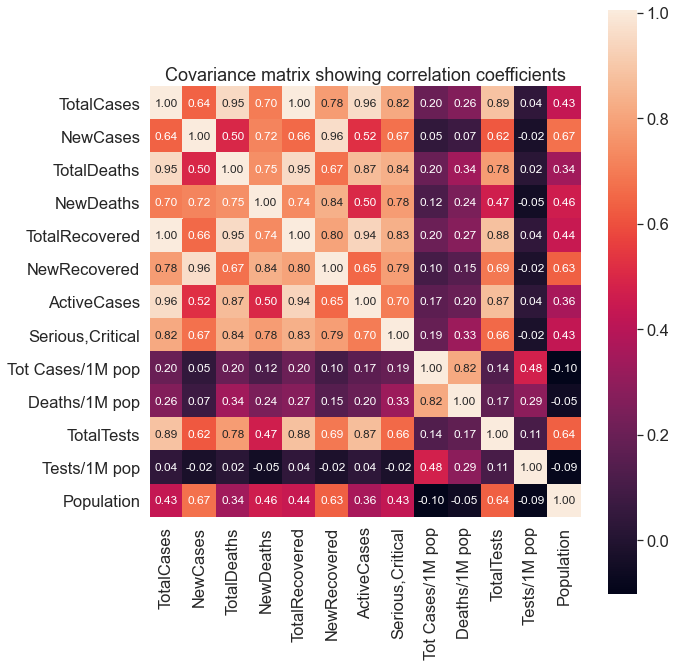

In [19]:
cov_mat =np.cov(X_std.T)
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm = sns.heatmap(cov_mat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 yticklabels=df.select_dtypes(exclude='object').columns,
                 xticklabels=df.select_dtypes(exclude='object').columns)
plt.title('Covariance matrix showing correlation coefficients')
plt.tight_layout()
plt.show()

- Choose 3 features that correlates strongly with each other.
- Choose 6 features and cross visualization 


- BAr chart
- Grouped BAr Chart
- Scatter 
- Heat map
- Area
- Line
- Stack Bar

**"Tot Cases/1M pop"Deaths/1M pop**

Chọn biểu đồ histogram để xem sự phân phối của "Tot Cases/1M pop"

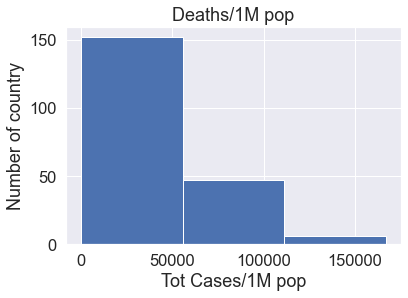

In [20]:
plt.hist(df['Tot Cases/1M pop'], bins = 3)
plt.xlabel('Tot Cases/1M pop')
plt.ylabel('Number of country')
plt.title('Deaths/1M pop')
plt.show()

Nhận xét về "Tot Cases/1M pop":
- Đa phần các quốc gia nằm trong khoảng từ 0 đến hơn 50000 với con số khoảng 150 quốc gia
- Các quốc gia mang chỉ số "Tot Cases/1M pop" cao hơn 100000 khá là ít
- Gần 50 quốc gia có chỉ số "Tot Cases/1M pop" từ 50000 - 100000

**"Deaths/1M pop"**

Tương tự với việc sử dụng biểu đồ histogram cho "Tot Cases/1M pop" ta cũng dùng cho "Deaths/1M pop" để xem xét sự phân phối của chỉ số này

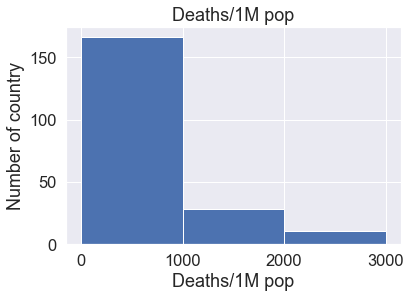

In [21]:
plt.hist(df['Deaths/1M pop'], bins = 3, range = [0,3000])
plt.xlabel('Deaths/1M pop')
plt.ylabel('Number of country')
plt.title('Deaths/1M pop')
plt.show()

Nhận xét về "Deaths/1M pop":
- Đa phần các quốc gia đều có chỉ số "Deaths/1M pop" từ 0 - 1000 với có số khoảng 175 quốc gia
- Một số ít quốc gia có chỉ số "Deaths/1M pop" từ 1000 - 2000 với con số khoảng 25 quốc gia
- Và một số rất ít quốc gia có chỉ số "Deaths/1M pop" từ 2000 - 3000
- Có vẻ như "Deaths/1M pop" có mối quan hệ gì đó với chỉ số "Tot Cases/1M pop" bởi vì phân phối của cả 2 chỉ số này khá giống nhau

**"Tot Cases/1M pop" vs "Deaths/1M pop"**
- Sử dụng scatter chart để xem mối tương quan giữa "Tot Cases/1M pop" vs "Deaths/1M pop

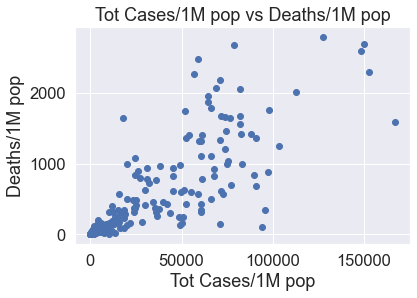

In [22]:
plt.scatter(df['Tot Cases/1M pop'], df['Deaths/1M pop'], marker= 'o')
plt.xlabel('Tot Cases/1M pop')
plt.ylabel('Deaths/1M pop')
plt.title('Tot Cases/1M pop vs Deaths/1M pop')
plt.show()

Nhận xét "Tot Cases/1M pop" vs "Deaths/1M pop":

- Ta có thể thấy "Tot Cases/1M pop" vs "Deaths/1M pop" 2 trường có mối quan hệ tương quan với nhau

**TotalCases**

Sử dụng Pie chart để xem tỉ lệ phần trăm của top 3 quốc gia có tổng số ca mắc COVID cao nhất so với các quốc gia khác

In [23]:
top3 = df.nlargest(3, 'TotalCases')

label = top3['Country,Other']
s2 = pd.Series(['Other'])
label = label.append(s2)

value = top3['TotalCases']
s2 = pd.Series([df[df['TotalCases'] < top3['TotalCases'].min()].sum()[1]])
value = value.append(s2)

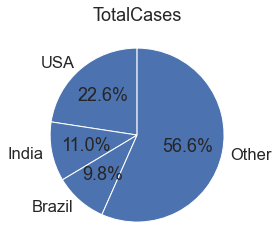

In [24]:
plt.pie(value, labels = label, colors = 'b', autopct='%1.1f%%', startangle=90)
plt.title('TotalCases')
plt.show()

Nhận xét về "TotalCases":
- Có thể thấy USA là quốc gia có tổng số ca mắc COVID cao nhất thế giới, đồng thời nó cũng chiếm tỉ lệ tới 22,6% trên tổng số ca nhiễm trên toàn thế giới gấp 2 lần quốc gia đứng thứ 2 là India với 11%
- Tổng số ca mắc COVID của 2 quốc gia India và Brazil chiếm tỉ trọng không quá nhiều

**TotalDeaths**

Dùng histogram để xem xét sự phân phối của tổng số người chết của các quốc gia

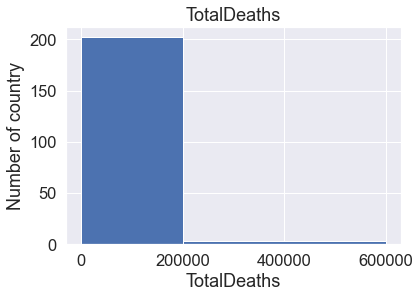

In [25]:
plt.hist(df['TotalDeaths'], bins = [0,200000,600000])
plt.xlabel('TotalDeaths')
plt.ylabel('Number of country')
plt.title('TotalDeaths')
plt.show()

Nhận xét "TotalDeaths":
- Có thể thầy hầu hết các quốc gia đều có tổng số người chết dưới 200000
- Một số ít quốc gia có tổng số người chết đặc biệt cao từ 200000 - 600000

**"TotalCases" vs "TotalDeaths"**
Dùng scatter chart để xem xét mối quan hệ giữa tổng số ca mắc bệnh và tổng số người chết

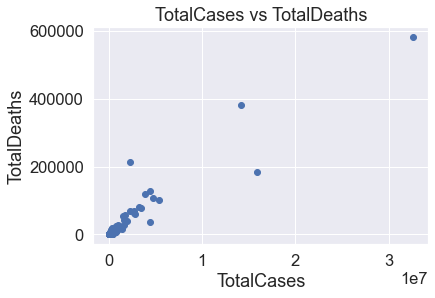

In [26]:
plt.scatter(df['TotalCases'], df['TotalDeaths'], marker= 'o')
plt.xlabel('TotalCases')
plt.ylabel('TotalDeaths')
plt.title(r'TotalCases vs TotalDeaths')
plt.show()

Nhận xét "TotalCases" vs "TotalDeaths":
- Hai chỉ só có mối quan hệ tương quan với nhau
- Hầu hết quốc gia đều đang ở tình trạng tổng số ca tử vong và ca mắc bệnh ở mức thấp
- Đặc biệt chỉ có một số rất ít quốc gia có tổng số ca tử vong và ca mắc bệnh có chỉ số cao ngất ngưỡng

## TotalTests, TotalDeaths, TotalRecovered

<AxesSubplot:xlabel='TotalDeaths', ylabel='TotalRecovered'>

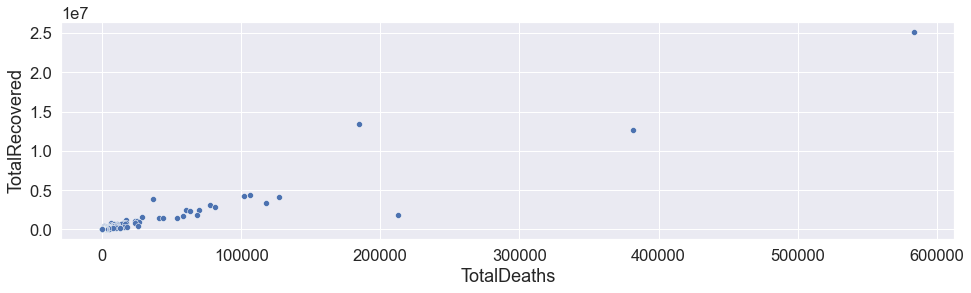

In [31]:
plt.figure(figsize=(16,4))
sns.scatterplot(data = df, x = 'TotalDeaths', y= 'TotalRecovered')#, style = 'TotalTests')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)